# Analise de dados utilizando a bilbioteca pandas

Para esse projeto, será feio uma análise de dados com a biblioteca pandas envolvendo os casos de covid-19. O dataset foi fornecido pelo Centro de Ciência de Sistemas e Engenharia na Johns Hopkins Center atráves do github https://github.com/CSSEGISandData/COVID-19.

Pelo fato da análise ser feita em uma instituição americana, existem mais informações entre as regiões e províncias dos Estados Unidos. Dessa maneira existem campos no dataset que são específicos para a análise no país e podem ser aqui descartados

## Descrição dos campos

* FIPS: Sigla que define *Federal Information Processing Standards*. Código que define unicamente os condados nos Estados Unidos. Válido apenas nos Estados Unidos.
* Admin2: Nome do condado. Válido apenas nos Estados Unidos.
* Province_State: Nome da província, estado ou dependência.
* Country_Region: Nome do pais ou região.
* Last Update: MM/DDYYY HH:mm:ss (formato UTC).
* Lat and LOng_: Localização geográfica, baseada no centróide do lugar.
* Confirmed: Casos confirmados e prováveis (quando reportados).
* Deaths: Mortes confirmadas e prováveis (quando reportados).
* Recovered: Casos recuperados dado nas estimativas médias dos locais.
* Active: Casos ativos = casos totais - recuperados - mortes.
* Incident_Rate: casos por 100000 de pessoas.
* Case_Fatality_Ratio(%): Razão de fatalidade = número de mortes/número de casos

# Importar a biblioteca pandas

In [1]:
import pandas as pd

## Lendo o arquivo .csv e criando um objeto df para o DataFrame onde podemos manipular os dados

In [2]:
df = pd.read_csv("dados/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2021.csv")

## Utilizando o método head para ver se é possível ver as 5 primeiras linhas do DataFrame

In [3]:
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-12 04:21:00,33.93911,67.709953,57160,2521,51989.0,2650.0,Afghanistan,146.833897,4.410427
1,NaN,NaN,NaN,Albania,2021-04-12 04:21:00,41.15330,20.168300,128393,2317,97723.0,28353.0,Albania,4461.498367,1.804616
2,NaN,NaN,NaN,Algeria,2021-04-12 04:21:00,28.03390,1.659600,118516,3130,82600.0,32786.0,Algeria,270.269512,2.640994
3,NaN,NaN,NaN,Andorra,2021-04-12 04:21:00,42.50630,1.521800,12545,120,11825.0,600.0,Andorra,16236.329515,0.956556
4,NaN,NaN,NaN,Angola,2021-04-12 04:21:00,-11.20270,17.873900,23457,553,22058.0,846.0,Angola,71.371048,2.357505


## Se quisermos ver, por exemplo a quantidade de linhas e colunas do conjunto de dados, utilizamos o comando df.shape

In [4]:
df.shape

(3987, 14)

Aqui temos no caso, 3987 linhas e 14 colunas.

## Podemos ver quantas regiões analisadas temos por pais

In [5]:
df["Country_Region"].value_counts().head(15)

US             3277
Russia           83
Japan            49
India            37
Colombia         34
China            34
Mexico           33
Brazil           27
Ukraine          27
Peru             26
Italy            21
Sweden           21
Spain            20
Netherlands      17
Germany          17
Name: Country_Region, dtype: int64

### Logo de cara vemos que existe um número muito maior de regiões analisadas nos Estados Unidos, o que significa que os números de casos confirmados,recuperados e mortes estarão espalhados nessas regiões ao invés de condensados em um único pais.

# Casos confirmados

Agora vamos fazer uma analise dos casos confirmados com o método sort_values adicionando o parâmetro ascending=False para mostrar em ordem descrescente de casos.

In [6]:
df.sort_values("Confirmed", ascending=False).head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
216,NaN,NaN,NaN,France,2021-04-12 04:21:00,46.227600,2.213700,5021865,98118,278477.0,4645270.0,France,7693.572547,1.953816
651,NaN,NaN,NaN,Turkey,2021-04-12 04:21:00,38.963700,35.243300,3849011,33939,3331411.0,483661.0,Turkey,4563.734384,0.881759
3963,NaN,NaN,England,United Kingdom,2021-04-12 04:21:00,52.355500,-1.174300,3819149,111797,0.0,3707352.0,"England, United Kingdom",6822.686737,2.927275
269,NaN,NaN,Maharashtra,India,2021-04-12 04:21:00,19.449759,76.108221,3407245,57987,2782161.0,567097.0,"Maharashtra, India",2766.873603,1.701874
65,NaN,NaN,Sao Paulo,Brazil,2021-04-12 04:21:00,-23.550500,-46.633300,2643534,82917,2269521.0,291096.0,"Sao Paulo, Brazil",5756.944139,3.136597
491,NaN,NaN,NaN,Poland,2021-04-12 04:21:00,51.919400,19.145100,2574631,58421,2171301.0,344909.0,Poland,6802.805694,2.269102
6,NaN,NaN,NaN,Argentina,2021-04-12 04:21:00,-38.416100,-63.616700,2532562,57779,2233140.0,241643.0,Argentina,5603.536808,2.281445
287,NaN,NaN,NaN,Iran,2021-04-12 04:21:00,32.427908,53.688046,2070141,64490,1710974.0,294677.0,Iran,2464.660339,3.115247
187,NaN,NaN,NaN,Czechia,2021-04-12 04:21:00,49.817500,15.473000,1580189,27808,1449052.0,103329.0,Czechia,14755.734952,1.759789
286,NaN,NaN,NaN,Indonesia,2021-04-12 04:21:00,-0.789300,113.921300,1566995,42530,1414507.0,109958.0,Indonesia,572.892021,2.714112


### Aqui é possível ver que o maior valor de casos confirmados pertence à França, justamente pelo fato dela ser tratada como uma única região nesse conjunto de dados

## Podemos analisar também o que está acontecendo um uma única região. Vamos analisar o Brasil

In [7]:
df[df["Country_Region"]=="Brazil"].sort_values("Confirmed", ascending=False).head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
65,NaN,NaN,Sao Paulo,Brazil,2021-04-12 04:21:00,-23.5505,-46.6333,2643534,82917,2269521.0,291096.0,"Sao Paulo, Brazil",5756.944139,3.136597
53,NaN,NaN,Minas Gerais,Brazil,2021-04-12 04:21:00,-18.5122,-44.5550,1225818,28004,1110032.0,87782.0,"Minas Gerais, Brazil",5790.684976,2.284515
60,NaN,NaN,Rio Grande do Sul,Brazil,2021-04-12 04:21:00,-30.0346,-51.2177,891554,21881,856467.0,13206.0,"Rio Grande do Sul, Brazil",7836.294904,2.454254
56,NaN,NaN,Parana,Brazil,2021-04-12 04:21:00,-25.2521,-52.0215,883365,19076,630204.0,234085.0,"Parana, Brazil",7725.803062,2.159470
45,NaN,NaN,Bahia,Brazil,2021-04-12 04:21:00,-12.5797,-41.7007,839395,16516,807761.0,15118.0,"Bahia, Brazil",5643.726135,1.967608
64,NaN,NaN,Santa Catarina,Brazil,2021-04-12 04:21:00,-27.2423,-50.2189,834448,12016,802756.0,19676.0,"Santa Catarina, Brazil",11646.513477,1.439994
61,NaN,NaN,Rio de Janeiro,Brazil,2021-04-12 04:21:00,-22.9068,-43.1729,679654,39423,632355.0,7876.0,"Rio de Janeiro, Brazil",3936.613055,5.800451
46,NaN,NaN,Ceara,Brazil,2021-04-12 04:21:00,-5.4984,-39.3206,586078,15441,407820.0,162817.0,"Ceara, Brazil",6417.794504,2.634632
49,NaN,NaN,Goias,Brazil,2021-04-12 04:21:00,-15.8270,-49.8362,507511,12783,484522.0,10206.0,"Goias, Brazil",7231.196944,2.518763
54,NaN,NaN,Para,Brazil,2021-04-12 04:21:00,-1.9981,-54.9306,437805,11200,409664.0,16941.0,"Para, Brazil",5089.060447,2.558217


Aqui fica muito claro que para o Brasil cada região é dado por um estado brasileiro.

# Agrupamento de Dados e funções de agregações

## Vamos agora responder algumas perguntas

Qual é a região com o maior número de casos?

Aqui utilizaremos a função de agregação groupby, na qual irá agregar a coluna ("Country_Region") e por qual filtro ("Confirmed") criando um objeto de DataFrame.

In [8]:
df.groupby("Country_Region")["Confirmed"]

Com o objeto criado, é possível realizar algumas operações, como por exemplo a soma dos casos confirmados por região analisada.

In [9]:
df.groupby("Country_Region")["Confirmed"].sum().sort_values(ascending=False).head(12)

Country_Region
US                31201415
India             13527717
Brazil            13482023
France             5119625
Russia             4589209
United Kingdom     4384610
Turkey             3849011
Italy              3769814
Spain              3347512
Germany            3012158
Poland             2574631
Colombia           2536198
Name: Confirmed, dtype: int64

### Veja aqui que todas as 3987 regiões nos Estados Unidos foram agrupadas em uma uńica região, filtrados pelos casos confirmados

## Se quisermos qual região dos Estados Unidos possui o maior número de casos confirmados

In [10]:
df[df["Country_Region"]== "US"].groupby("Province_State")["Confirmed"].sum().sort_values(ascending=False).head(20)



Province_State
California        3700471
Texas             2826977
Florida           2124233
New York          1956594
Illinois          1279772
Pennsylvania      1077353
Georgia           1073792
Ohio              1039455
New Jersey         953490
North Carolina     929406
Arizona            849561
Tennessee          822085
Michigan           820404
Indiana            698692
Massachusetts      659569
Wisconsin          645514
Virginia           635552
Missouri           588626
South Carolina     562691
Minnesota          542053
Name: Confirmed, dtype: int64

## Tratando de dados nulos e duplicados

Existem dados nulos no conjunto?

In [11]:
df.isnull().tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
3982,True,True,True,False,False,False,False,False,False,False,False,False,False,False
3983,True,True,True,False,False,False,False,False,False,False,False,False,False,False
3984,True,True,True,False,False,False,False,False,False,False,False,False,False,False
3985,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3986,True,True,True,False,False,False,False,False,False,False,False,False,False,False


Aqui, o método isnull irá atuar em cada célula do nosso DataFrame e retornando True se a célula é do tipo nula e False se não for.

Para analisar a soma dos dados nulos, temos:

In [12]:
df.isnull().sum()

FIPS                    721
Admin2                  716
Province_State          174
Country_Region            0
Last_Update               0
Lat                      88
Long_                    88
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3279
Combined_Key              0
Incident_Rate            88
Case_Fatality_Ratio      39
dtype: int64

Aqui temos a soma das células nulas no dataset. Esses valores nulos muito se deve do fato que a analise dos dados é feita predominantemente nos Estado Unidos, já que o conjunto de dados foi feito lá. Logo existe alguns dados faltantes de outras regiões.

### Quantos países existem no conjunto?

In [13]:
df["Country_Region"].unique().shape

(195,)

Temos 196 países analisados.

No conjunto de dados, onde há um dado nulo, a célula retornará "NA". Se quisermos mudar o retorno de um dado nulo para algo mais interessante podemos fazer:

In [14]:
df.fillna("SEM DADOS").tail(3)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
3984,SEM DADOS,SEM DADOS,SEM DADOS,Palau,2021-04-12 04:21:00,7.515,134.5825,0,0,0.0,0.0,Palau,0.0,0.0
3985,SEM DADOS,SEM DADOS,Cook Islands,New Zealand,2021-04-12 04:21:00,-21.2367,-159.7777,0,0,0.0,0.0,"Cook Islands, New Zealand",0.0,0.0
3986,SEM DADOS,SEM DADOS,SEM DADOS,Summer Olympics 2020,2021-04-12 04:21:00,35.6491,139.7737,0,0,0.0,0.0,Summer Olympics 2020,0.0,0.0


### Outra maneira de ver o número de países pela coluna "Country_Region" utilizando o drop_duplicates()

In [15]:
df["Country_Region"].drop_duplicates()

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
                ...         
3981                  Zambia
3982                Zimbabwe
3983                Kiribati
3984                   Palau
3986    Summer Olympics 2020
Name: Country_Region, Length: 195, dtype: object

# Visualização de Dados

*  Histograma
*  Gráfico de Dispersão
*  Gráfico de Linha

Para a plotagem de gráficos a biblioteca que será utilzada é a matplotlib

In [16]:
from matplotlib import pyplot as plt

## Vamos agora criar um outro DataFrame para analisar visualmente alguns dados dos estados brasileiros

Com esse DataFrame criado, vamos analisar o total de mortes por estado brasileiro.

In [17]:
br_subset_df = df[df["Country_Region"]=="Brazil"]

br_subset_df.groupby("Province_State")["Deaths"].sum().sort_values(ascending=False)

Province_State
Sao Paulo              82917
Rio de Janeiro         39423
Minas Gerais           28004
Rio Grande do Sul      21881
Parana                 19076
Bahia                  16516
Ceara                  15441
Pernambuco             12803
Goias                  12783
Amazonas               12257
Santa Catarina         12016
Para                   11200
Mato Grosso             8428
Espirito Santo          8164
Distrito Federal        6754
Maranhao                6557
Paraiba                 6176
Rio Grande do Norte     4884
Mato Grosso do Sul      4870
Rondonia                4548
Piaui                   4493
Alagoas                 3802
Sergipe                 3770
Tocantins               2248
Roraima                 1393
Amapa                   1390
Acre                    1343
Name: Deaths, dtype: int64

Agora vamos criar um histograma para analisar o número de ocorrências agrupadas por número de mortes

<AxesSubplot:>

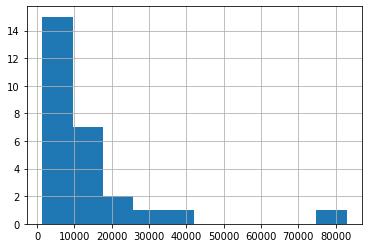

In [18]:
br_subset_df.groupby("Province_State")["Deaths"].sum().hist()

Podemos perceber aqui que o histograma coincide com a análise feita anteriormente, ou seja, muitos estados na casa dos 10000 à 20000 mortos e apenas São Paulo com aproximadamente 80000 mortos.

Se quisermos fazer uma análise de correlação entre o número de casos confirmados e mortos, pode-se utilizar o método plot.scatter

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

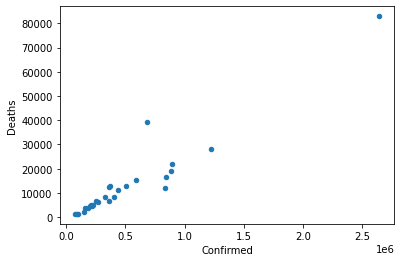

In [19]:
br_subset_df.plot.scatter(x="Confirmed", y="Deaths")

É possível notar uma correlação entre o número de casos confirmados e o número de mortos.

# Análise Temporal dos casos

Para fazer uma análise temporal dos casos confirmados e de mortes, vamos criar uma função que pega todos os arquivos .csv e cria um novo DataFrame contendo todos os casos de todos os meses, iniciando em 22/01/2020 até 07/09/2021. Para isso vamos importar a biblioteca datetime que irá ajudar nas conversões de tempo e a biblioteca glob que permite listar diretórios e manipular diretórios utilizado para unir os arquivos .csv em um único DataFrame.

In [20]:
import glob
import datetime

In [21]:
path = "dados/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports"
all_files = glob.glob(path + "/*.csv")

dfs=[]

for filename in all_files:
    temp_df = pd.read_csv(filename)
    temp_df.columns = [c.replace("/","_") for c in temp_df.columns]
    temp_df.columns = [c.replace(" ","_") for c in temp_df.columns]
    
    mes,dia,ano = filename.split("/")[-1].replace(".csv","").split("-")
    d = datetime.date(int(ano), int(mes), int(dia))
    temp_df["Date"] = d
    
    dfs.append(temp_df)
    
all_days_df = pd.concat(dfs, axis = 0, ignore_index = True, sort=False)
all_days_df = all_days_df.drop(["Latitude","Longitude", "Lat", "Long_", "FIPS", "Combined_Key", "Last_Update"], axis=1)

O novo DataFrame contém todos os casos desde a data inicial 22/01/2020 até  07/09/2021 (Algumas regiões podem não conter essas datas por falta de dados). Ele contém a quantidade de casos confirmados, mortes e recuperados de maneira cumulativa de acordo com a data em um único DataFrame. Agora, e se quisermos saber a quantidade de casos confirmados e mortos no Brasil desde o inicio da coleta de dados?

Para isso, criamos um novo Dataframe filtrando a coluna 'Country_Region' para no Brasil.

In [22]:

df_Brasil = all_days_df[all_days_df["Country_Region"]=="Brazil"]
df_Brasil.head(15)

,Admin2,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,Date,Incident_Rate,Case_Fatality_Ratio
30,NaN,Acre,Brazil,22516.0,576.0,15505.0,6435.0,2553.022615,2.558181,2020-08-15,NaN,NaN
31,NaN,Alagoas,Brazil,72076.0,1742.0,65579.0,4755.0,2159.673059,2.416893,2020-08-15,NaN,NaN
32,NaN,Amapa,Brazil,39431.0,613.0,27512.0,11306.0,4662.357180,1.554614,2020-08-15,NaN,NaN
33,NaN,Amazonas,Brazil,111241.0,3463.0,93911.0,13867.0,2684.000399,3.113061,2020-08-15,NaN,NaN
34,NaN,Bahia,Brazil,214379.0,4338.0,194155.0,15886.0,1441.390960,2.023519,2020-08-15,NaN,NaN
35,NaN,Ceara,Brazil,197381.0,8129.0,167053.0,22199.0,2161.402914,4.118431,2020-08-15,NaN,NaN
36,NaN,Distrito Federal,Brazil,135014.0,1958.0,114355.0,18701.0,4477.678269,1.450220,2020-08-15,NaN,NaN
37,NaN,Espirito Santo,Brazil,98765.0,2864.0,84840.0,11061.0,2457.666132,2.899813,2020-08-15,NaN,NaN
38,NaN,Goias,Brazil,100938.0,2286.0,91394.0,7258.0,1438.200467,2.264757,2020-08-15,NaN,NaN
39,NaN,Maranhao,Brazil,136280.0,3253.0,124036.0,8991.0,1926.169804,2.386997,2020-08-15,NaN,NaN


Perceba que as primeiras 15 linhas do novo DataFrame não correspondem as datas iniciais da coleta de dados para cada estado, logo vamos utilizar o sort_values para verificar se o menor valor da coluna Date corresponde à 22/01/2020 que só é possível pois a função criada para juntar os arquivos .csv criou a coluna Date do tipo datetime.

In [23]:
df_Brasil.sort_values("Date")

,Admin2,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,Date,Incident_Rate,Case_Fatality_Ratio
694905,NaN,NaN,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-23,NaN,NaN
1016003,NaN,NaN,Brazil,1.0,0.0,0.0,NaN,NaN,NaN,2020-02-26,NaN,NaN
573904,NaN,NaN,Brazil,1.0,0.0,0.0,NaN,NaN,NaN,2020-02-27,NaN,NaN
553896,NaN,NaN,Brazil,1.0,0.0,0.0,NaN,NaN,NaN,2020-02-28,NaN,NaN
93880,NaN,NaN,Brazil,2.0,0.0,0.0,NaN,NaN,NaN,2020-02-29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1468265,NaN,Acre,Brazil,87899.0,1815.0,NaN,NaN,NaN,NaN,2021-09-07,9966.607516,2.06487
1468268,NaN,Amazonas,Brazil,425063.0,13697.0,NaN,NaN,NaN,NaN,2021-09-07,10255.834283,3.222346
1468267,NaN,Amapa,Brazil,122547.0,1959.0,NaN,NaN,NaN,NaN,2021-09-07,14490.068355,1.59857
1468279,NaN,Paraiba,Brazil,436098.0,9220.0,NaN,NaN,NaN,NaN,2021-09-07,10853.265713,2.114204


Veja que, como dito, em algumas regiões a coleta não se iniciou no dia 22/01/2020. O DataFrame mostra que a primeira coleta foi feita no dia 26/01/2020 na qual nem se informou o estado.

Agora vamos ver o retorno das ultimas 27 linhas do DataFrame, com o sort_values.

In [24]:
df_Brasil.sort_values("Date")[-27:-1]

,Admin2,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,Date,Incident_Rate,Case_Fatality_Ratio
1468284,NaN,Rio Grande do Sul,Brazil,1414422.0,34350.0,NaN,NaN,NaN,NaN,2021-09-07,12432.032060,2.428554
1468281,NaN,Pernambuco,Brazil,610980.0,19476.0,NaN,NaN,NaN,NaN,2021-09-07,6392.962865,3.187666
1468282,NaN,Piaui,Brazil,317558.0,6963.0,NaN,NaN,NaN,NaN,2021-09-07,9701.679719,2.19267
1468283,NaN,Rio Grande do Norte,Brazil,365736.0,7286.0,NaN,NaN,NaN,NaN,2021-09-07,10429.179666,1.992147
1468285,NaN,Rio de Janeiro,Brazil,1140025.0,63312.0,NaN,NaN,NaN,NaN,2021-09-07,6603.120555,5.553562
1468266,NaN,Alagoas,Brazil,236840.0,6111.0,NaN,NaN,NaN,NaN,2021-09-07,7096.633654,2.580223
1468287,NaN,Roraima,Brazil,124441.0,1957.0,NaN,NaN,NaN,NaN,2021-09-07,20542.920393,1.572633
1468288,NaN,Santa Catarina,Brazil,1163834.0,18831.0,NaN,NaN,NaN,NaN,2021-09-07,16243.802329,1.618014
1468289,NaN,Sao Paulo,Brazil,4295149.0,146595.0,NaN,NaN,NaN,NaN,2021-09-07,9353.741189,3.413036
1468291,NaN,Tocantins,Brazil,220290.0,3704.0,NaN,NaN,NaN,NaN,2021-09-07,14005.643202,1.68142


Aqui é possível que para os 27 estados brasileiros houve a coleta no dia 07/09/2021. Agora basta fazer a soma a coluna 'Confirmed' e 'Deaths' para ter o número de casos confirmados e de mortes até esse dia.

In [25]:
print("O número de casos confirmados no Brasil é de " + str(int(df_Brasil.sort_values("Date")[-27:-1]["Confirmed"].sum())))
print("O número mortes no Brasil é de " + str(int(df_Brasil.sort_values("Date")[-27:-1]["Deaths"].sum())))

O número de casos confirmados no Brasil é de 20636648
O número mortes no Brasil é de 578107


## Realizando uma análise temporal dos casos confirmados de todo o mundo

A partir do DataFrame all_days_df podemos fazer umas análises temporais.

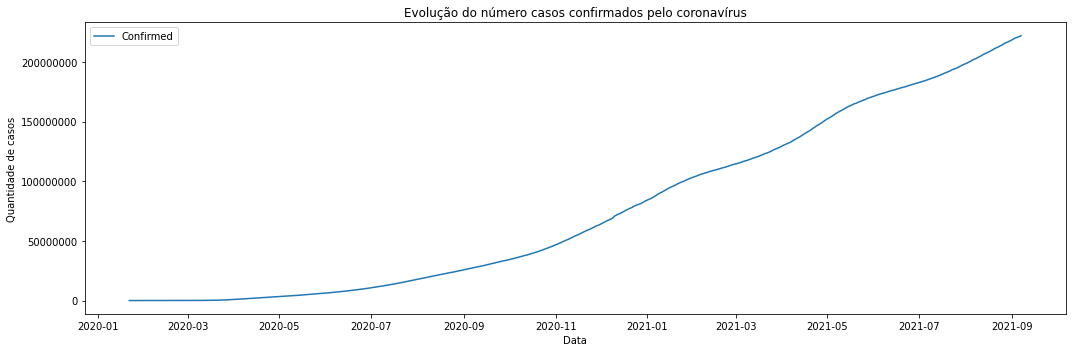

In [26]:
df_0 = all_days_df.groupby("Date")[["Confirmed"]].sum()

fig, ax = plt.subplots(figsize = (15,5))

df_0.plot(kind='line', ax=ax)
ax.set_title('Evolução do número casos confirmados pelo coronavírus')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()


É possível notar o alto crescimento de casos confirmados no final do ano de 2020 e no inicio desse ano.

### Crescimento do número de mortes

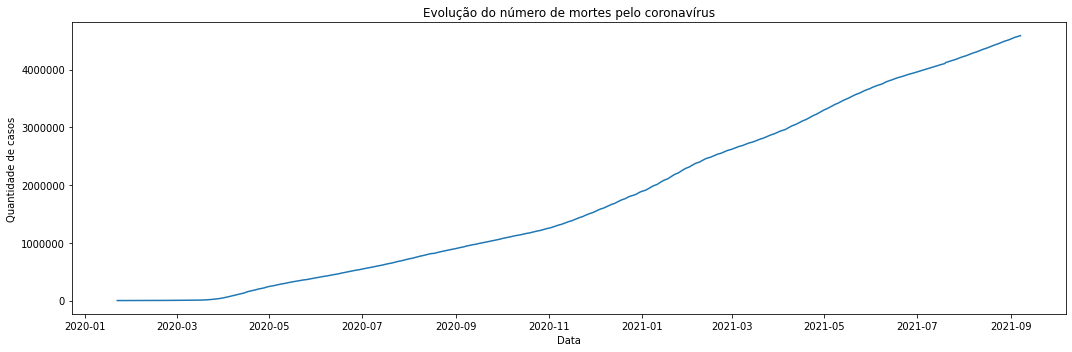

In [27]:
df_1 = all_days_df.groupby("Date")["Deaths"].sum()


fig, ax = plt.subplots(figsize = (15,5))

df_1.plot(kind='line', ax=ax)
ax.set_title('Evolução do número de mortes pelo coronavírus')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()



## Comparação entre o número de casos confirmados e mortes e no Brasil.

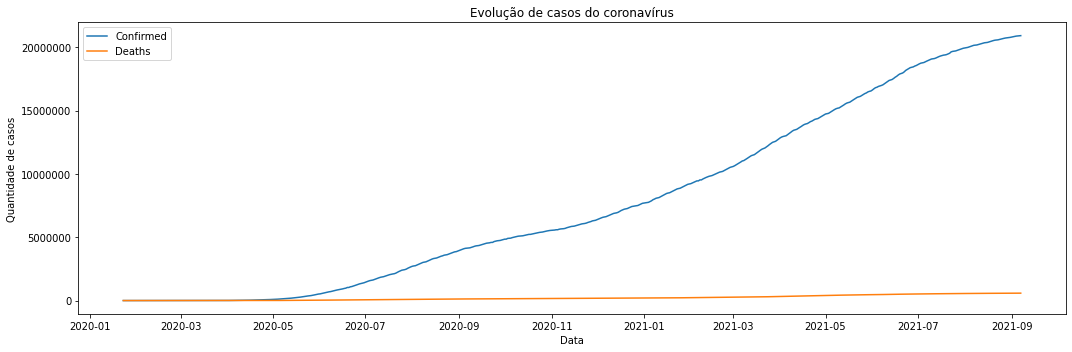

In [28]:
df_2=all_days_df[all_days_df["Country_Region"] =="Brazil"].groupby("Date")[["Confirmed","Deaths"]].sum()

fig, ax = plt.subplots(figsize = (15,5))

df_2.plot(kind='line', ax=ax)
ax.set_title('Evolução de casos do coronavírus')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()


# Conclusão

Através de bibliotecas como a pandas, matplotlib, seaborn e muitas outras fazem do Python uma excelente linguagem para análise de dados. Através dessas ferramentas é possível transformar dados em informação e posteriormente tirar valor dessas informações. Dessa maneira se responde perguntas e no mundo dos negócios pode-se trazer insights importantes que facilitam a tomada de decisãoe no caso de assuntos de extrema importância como o acompanhamento dos casos de Covid-19.